# 2.2 Feature Extraction
#### <font color='gray'>Vicent Santamarta Martinez</font>

### Description of the procedure

The center of each camera, the origins of f1g and f2g, plus the world point P defines a
plane in space – the epipolar plane. The world point P is projected onto the image
planes of the two cameras at points 1p and 2p respectively, and these points are
known as conjugate points. The intersection of the epipolar plane and a camera’s
image plane is an epipolar line. By definition, the conjugate point 2p must lie on that
line. Conversely 1p must lie along the epipolar line in image one 1` that is defined
by 2p in image two.

given a point in one image we know that its conjugate is constrained to lie along a line in the
other image – the epipolar constraint.

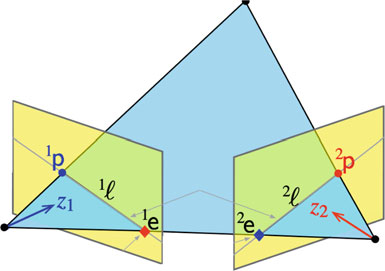

The epipolar relationship can be represented as: 


$
²\tilde{p}^T F ¹\tilde{p} = 0
$

where $¹\tilde{p}$ and $²\tilde{p}$ are homogeneous coordinate vectors describing the image
points ¹p and ²p respectively, and $F \subset \mathbb{R}^{3x3}$ is known as the fundamental matrix.

The fundamental matrix is a function of the camera parameters and the relative camera pose betwenn views, with the camera intrinsic matrices and the relative orientation and translation of camera one with respect of camera two. 

### Implementation

In [19]:
#@title="imports"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
from IPython.core.display import HTML

import RVC3 as rvc
import sys, os.path
sys.path.append(os.path.join(rvc.__path__[0], 'examples'))

import numpy as np
from scipy import linalg, stats
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from machinevisiontoolbox.base import *
from machinevisiontoolbox import *
from spatialmath.base import *
from spatialmath import *

### Camera description and the creation of the point

In [20]:
# Describe the cameras
camera1 = CentralCamera(name="camera 1", f=0.002, imagesize=1000, \
                        rho=10e-6, pose=SE3.Tx(-0.1)*SE3.Ry(0.4)) 

           Name: camera 1 [CentralCamera]
     pixel size: 1e-05 x 1e-05
     image size: 1000 x 1000
           pose: t = -0.1, 0, 0; rpy/yxz = 0°, 0°, 22.9°
   principal pt: [     500      500]
   focal length: [   0.002    0.002]

In [21]:
camera2 = CentralCamera(name="camera 2", f=0.002, imagesize=1000, \
                        rho=10e-6, pose=SE3.Tx(0.1)*SE3.Ry(-0.4))

           Name: camera 2 [CentralCamera]
     pixel size: 1e-05 x 1e-05
     image size: 1000 x 1000
           pose: t = 0.1, 0, 0; rpy/yxz = 0°, 0°, -22.9°
   principal pt: [     500      500]
   focal length: [   0.002    0.002]

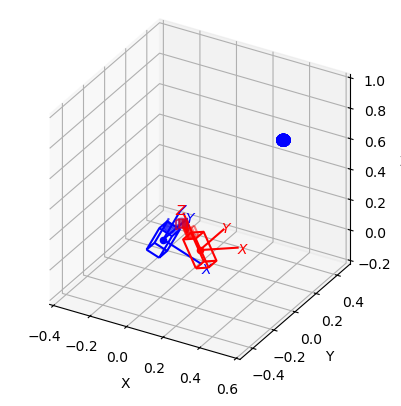

In [22]:
# define the point in the 3d world
ax = plotvol3([-0.4, 0.6, -0.5, 0.5, -0.2, 1]);
camera1.plot(ax=ax, scale=0.15, shape="camera", frame=True, color="blue")
camera2.plot(ax=ax, scale=0.15, shape="camera", frame=True, color="red")
P=[0.5, 0.1, 0.8]
plot_sphere(0.03, P, color="blue")

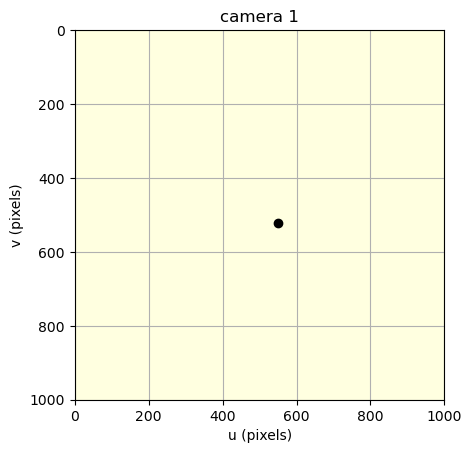

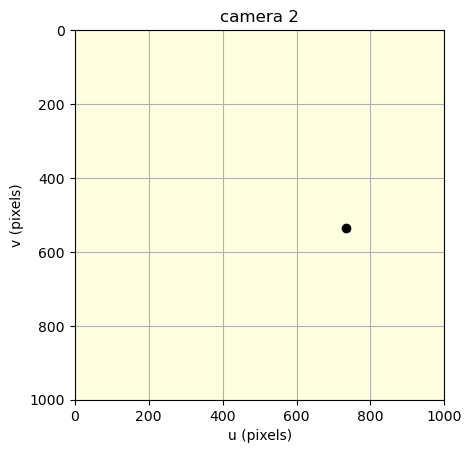

array([[     734],
       [   534.4]])

In [27]:
plotvol2(new=True)
p1 = camera1.plot_point(P)
p2 = camera2.plot_point(P)

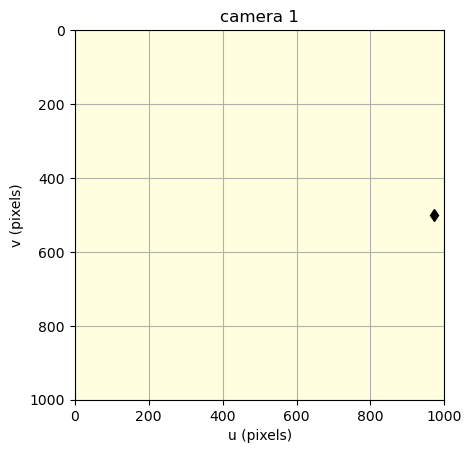

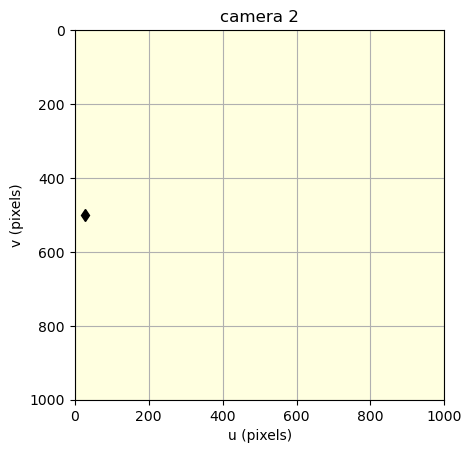

array([[   26.96],
       [     500]])

In [28]:
e1 = camera1.plot_point(camera2.centre, "kd")
e2 = camera2.plot_point(camera1.centre, "kd")

### Calculate the fundamental Matrix for camera 1 and 2

In [30]:
# Calculate the Fundamental matrix of the image
F = camera2.F(camera1)

array([[       0, -1.947e-06, 0.0009735],
       [-1.947e-06,        0, 5.248e-05],
       [0.0009735, 0.001895,  -0.9735]])